In [1]:
from itertools import count
import gc
import time
import pandas as pd
import numpy as np

from agent.main import Agent
from emulator.main_test import Account

from IPython.display import clear_output

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

from params import *

init quotes shape
(6341, 5)
init factors shape
(6142, 42)
init daily shape
(3451, 6)
smp daily shape
(3351, 6)
smp factors shape
(3451, 42)
(3351, 56, 42, 1)


In [2]:
env = Account()
state = env.reset()
image_shape = state.shape
print(image_shape)
agent2 = Agent(image_shape, 3)
#agent2.load_model('/AI/Traind_Intra_Torch_model/HS1/value_net.pkl',
#                  '/AI/Traind_Intra_Torch_model/HS1/target_net.pkl')
agent2.load_model()

(1, 56, 42)
(1, 56, 42)
3
(1, 56, 42)
3


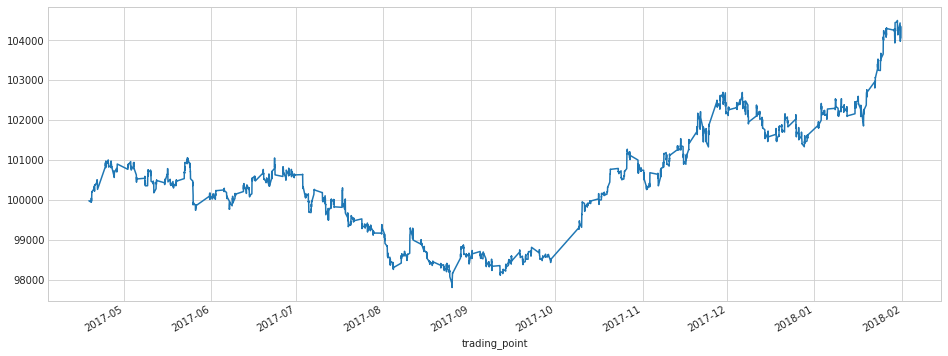

In [3]:
for i in range(TEST_SMP-1):
    action = agent2.get_deterministic_policy(np.expand_dims(state, 0))
    next_state, reward, done = env.step(action)
    state = next_state
tmp = env.plot_data()
tmp.iloc[0:, 0].plot(figsize=(16, 6))
plt.savefig("样本外2.png")

In [4]:
test_data = tmp.iloc[0:]

ratio = np.sum(np.maximum(np.sign(test_data['reward']), 0))/test_data.shape[0]
print("胜率:", ratio)

胜率: 0.47596297402209614
